### HomeWork 2
Group: 14
    
Contributors:
- Ramya Madhuri Desineedi
- Abhinav Sharma
- Serena Wu


In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

### 1. Create a unique name for each restaurant.

In [3]:
df['RESTAURANT'] = df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']+' '+df['BORO']
df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### 2. How many restaurants are included in the data?

In [4]:
print("No. of Unique Restaurants:",len(df["RESTAURANT"].unique()))

No. of Unique Restaurants: 10114


### 3. How many chains are there?

In [5]:
df_restaurant_dedup = df[["DBA","BORO","RESTAURANT"]].drop_duplicates()
mask = df_restaurant_dedup["DBA"].value_counts() >= 2
mask.sum()

368

### 4. Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

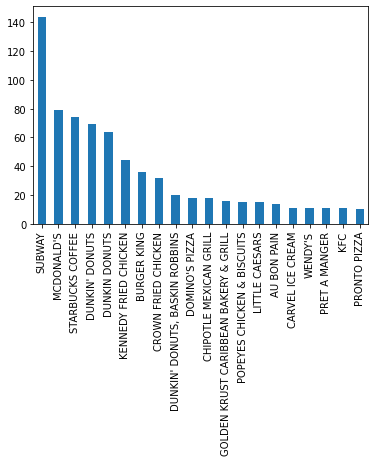

In [6]:
df_restaurant_dedup["DBA"].value_counts()[:20].sort_values(ascending=False).plot(kind = 'bar')

### 5. What fraction of all restaurants are chain restaurants?

In [7]:
df_restaurant_dedup['Occurences'] = df_restaurant_dedup.groupby("DBA")["DBA"].transform('size')
df_restaurant_dedup['Chain_Flag'] = np.where(df_restaurant_dedup.Occurences>=2,1,0)
round(df_restaurant_dedup['Chain_Flag'].sum()/len(df_restaurant_dedup['DBA']),4)

0.1647

### 6. Plot the number of non-chain restaurants in each boro.

<AxesSubplot:>

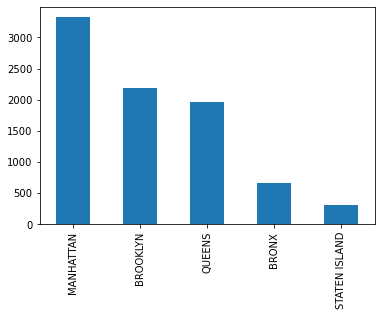

In [8]:
mask1 = df_restaurant_dedup["Chain_Flag"]==0
mask2 = df_restaurant_dedup["BORO"]!='Missing'
df_restaurant_dedup[mask1 & mask2]["BORO"].value_counts().sort_values(ascending=False).plot(kind = 'bar')

### 7. Plot the fraction of non-chain restaurants in each boro.

<AxesSubplot:xlabel='BORO'>

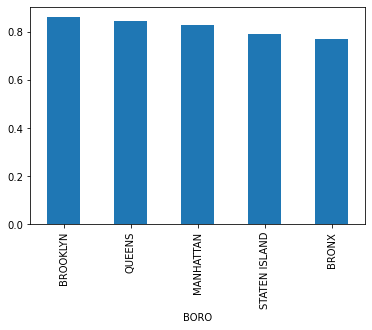

In [9]:
s1 = df_restaurant_dedup[mask1 & mask2][["BORO"]].value_counts().reset_index()
s2 = df_restaurant_dedup[mask2][["BORO"]].value_counts().reset_index()
s1['Ratio'] = s1.iloc[:,1] / s2.iloc[:,1]
s1.set_index('BORO',inplace=True)
s1['Ratio'].sort_values(ascending=False).plot(kind='bar')

### 8. Plot the popularity of cuisines.

<AxesSubplot:>

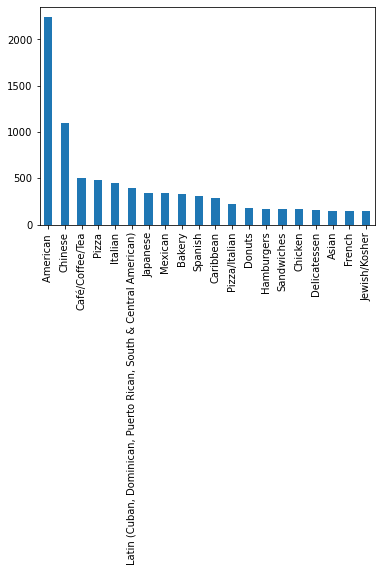

In [10]:
df_cuisine= df[["DBA","BORO","RESTAURANT","CUISINE DESCRIPTION"]].drop_duplicates()
df_cuisine["CUISINE DESCRIPTION"].value_counts()[:20].sort_values(ascending=False).plot(kind = 'bar')

### 9. Plot the cuisines among restaurants which never got cited for violations.

In [41]:
df_no_violations = df[df["VIOLATION CODE"].isnull()]
df_no_violations = df_no_violations.drop_duplicates()
df_no_violations.shape

(577, 20)

In [47]:
df_cuisine_sub = df_no_violations[["RESTAURANT", "CUISINE DESCRIPTION"]].drop_duplicates()
df_cuisine_sub.shape

(553, 2)

In [50]:
#Double check if all unclean restaurants removed
non_clean_restaurants = df[-df["VIOLATION CODE"].isnull()]["RESTAURANT"].value_counts().index.values
non_clean_restaurants

array(["BREEZE'S JAMAICAN RESTAURANT & BAKERY 1135       FLATBUSH AVENUE                                    11226 BROOKLYN",
       'LEXINGTON PIZZA PARLOUR 1590       LEXINGTON AVENUE                                   10029 MANHATTAN',
       'CAFE LINCOLN 253        EAST  149 STREET                                                                                     10451 BRONX',
       ..., 'BURGER KING 950 JEWETT AVENUE 10314 STATEN ISLAND',
       'THELEWALA 112 MACDOUGAL STREET 10012 MANHATTAN',
       'STARBUCKS COFFEE 291 BROADWAY 10007 MANHATTAN'], dtype=object)

<AxesSubplot:>

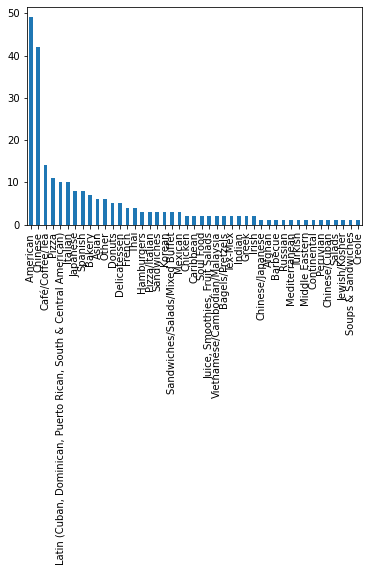

In [55]:
df_cuisine_sub_2 = df_cuisine_sub[~df_cuisine_sub['RESTAURANT'].isin(non_clean_restaurants)]
df_cuisine_sub_2["CUISINE DESCRIPTION"].value_counts().plot(kind='bar')

### 10. What cuisines tend to be the “cleanest”?

In [82]:
# count the number of restaurants in each cuisine
cuisine_total = df.drop_duplicates(subset=['RESTAURANT',"CUISINE DESCRIPTION"])["CUISINE DESCRIPTION"].value_counts()

# return the cuisines with over 20 restaurants
def more_than_twenty(cuisine):
    return cuisine_total[cuisine] >= 20

# count the number of restaurants in each cuisine
denominator = df[df["CUISINE DESCRIPTION"].map(more_than_twenty)]['CUISINE DESCRIPTION'].value_counts()

In [83]:
# obtain restaurants that have no violation code
no_violation = df[df['VIOLATION CODE'].isna()].drop_duplicates(subset=['RESTAURANT','CUISINE DESCRIPTION'])

# count the number of restaurants in each cuisine
numerator = no_violation['CUISINE DESCRIPTION'].value_counts()

<AxesSubplot:>

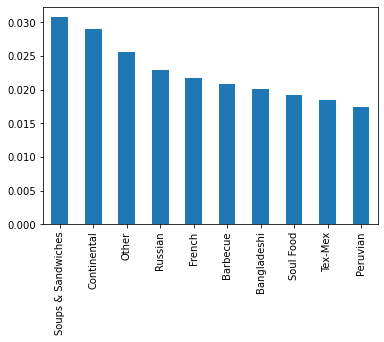

In [84]:
# calculate fraction
(numerator/denominator).sort_values(ascending=False)[:10].plot(kind="bar")

### 11. What are the most common violations in each borough?

In [85]:
violations = pd.crosstab(total['VIOLATION DESCRIPTION'], total[total['BORO']!='Missing']['BORO'])
violations.idxmax()

NameError: name 'total' is not defined

### 12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [86]:
violationFrequency = total['VIOLATION DESCRIPTION'].value_counts()
violationFrequency = violationFrequency.reset_index()
violationFrequency.set_index('index', inplace=True)

NameError: name 'total' is not defined

In [87]:
normalize = violationFrequency.merge(violations, left_index=True, right_index=True)
normalize

NameError: name 'violationFrequency' is not defined

In [88]:
normalize['BRONX'] /= normalize['VIOLATION DESCRIPTION']
normalize['BROOKLYN'] /= normalize['VIOLATION DESCRIPTION']
normalize['MANHATTAN'] /= normalize['VIOLATION DESCRIPTION']
normalize['QUEENS'] /= normalize['VIOLATION DESCRIPTION']
normalize['STATEN ISLAND'] /= normalize['VIOLATION DESCRIPTION']
normalize

NameError: name 'normalize' is not defined

In [89]:
normalize.drop(columns='VIOLATION DESCRIPTION').idxmax()

NameError: name 'normalize' is not defined

### 13. How many phone area codes correspond to a single zipcode?

In [32]:
def get_first_three(x):
    # get first three characters of phone number if input is phone number
    return x[0:3]
        
phone = df.drop_duplicates(subset = ["RESTAURANT"])['PHONE'].map(get_first_three).reset_index()

In [33]:
# merge phone and zip code into a dataframe
zip_phone = df.drop_duplicates(subset = ["RESTAURANT"])['ZIPCODE'].reset_index().merge(phone)

In [34]:
# drop duplicated "zip code and phone number" pairs, then count the phones that only match one zipcode
results_mask = zip_phone.drop_duplicates(subset=['ZIPCODE','PHONE'])['PHONE'].value_counts() == 1
results_mask.sum()

34

In [35]:
#Validating count of 34 zips
zip_phone.drop_duplicates(subset=['ZIPCODE','PHONE'])['PHONE'].value_counts()

718    151
347    130
917    117
646     95
212     65
516     21
929     15
201     11
914      9
___      7
732      5
215      4
631      3
845      3
877      3
703      2
862      2
813      2
270      2
848      2
407      2
973      2
410      1
502      1
612      1
171      1
860      1
728      1
626      1
607      1
610      1
570      1
617      1
702      1
605      1
206      1
716      1
412      1
191      1
954      1
303      1
964      1
281      1
985      1
175      1
202      1
404      1
305      1
434      1
970      1
000      1
505      1
855      1
908      1
615      1
905      1
Name: PHONE, dtype: int64

### 14. Find common misspellings of street names.

Create a new column, called STREET TYPE, which is the the last word
in the name of the street. For example, if the street is “Astoria Boulevard”, the street type should be “Boulevard”

In [93]:
df['STREET TYPE'] = [val[-1] for val in df['STREET'].str.split(' ')]
df['STREET BASE'] = [val[:-1] for val in df['STREET'].str.split(' ')]
df['STREET TYPE']

0        AVENUE
1        AVENUE
2        AVENUE
3        AVENUE
4        AVENUE
          ...  
44628       AVE
44629        ST
44630        ST
44631        ST
44632        ST
Name: STREET TYPE, Length: 44633, dtype: object

Create another column, called STREET BASE, which contains everything
but the last word in the name of the street. For example, if the street
is “Astoria Boulevard”, the street base should be “Astoria”.

In [94]:
df['STREET BASE'] = df['STREET BASE'].str.join(" ")
df['STREET BASE']

0         FLATBUSH
1         FLATBUSH
2         FLATBUSH
3         FLATBUSH
4         FLATBUSH
           ...    
44628    MANHATTAN
44629       E 13TH
44630       E 13TH
44631       E 13TH
44632       E 13TH
Name: STREET BASE, Length: 44633, dtype: object

Create a third column, called STREET BASE & ZIP, that combines the
street base and the zipcode.

In [95]:
df['STREET BASE & ZIP'] = df['STREET BASE'] +" "+ df['ZIPCODE']
df['STREET BASE & ZIP']

0         FLATBUSH 11225
1         FLATBUSH 11225
2         FLATBUSH 11225
3         FLATBUSH 11225
4         FLATBUSH 11225
              ...       
44628    MANHATTAN 11222
44629       E 13TH 10009
44630       E 13TH 10009
44631       E 13TH 10009
44632       E 13TH 10009
Name: STREET BASE & ZIP, Length: 44633, dtype: object

Create a table containing just these three columns, and remove any
duplicates or instances where street base is empty. This table now
contains unique street names, along with the street type.

In [96]:
df_streets = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]
df_streets.isnull().sum()


STREET TYPE          0
STREET BASE          0
STREET BASE & ZIP    0
dtype: int64

In [97]:
df_streets.shape

(44633, 3)

In [98]:
df_streets = df_streets.dropna(how="any").drop_duplicates()
df_streets[:10]

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
24,AVENUE,CHURCH,CHURCH 11218
26,AVENUE,3,3 11209
30,STREET,EAST 74,EAST 74 10021
31,WEST,PROSPECT PARK,PROSPECT PARK 11215
34,BROADWAY,,10003


In [99]:
df_streets.shape

(3872, 3)

Merge this table with itself, on the STREET BASE & ZIP column. Thus,
in the new merged tabled, we will have two STREET TYPE fields for
each street base and zipcode. 

In [100]:
merged_street = df_streets.merge(df_streets,on = "STREET BASE & ZIP")

In [101]:
merged_street[:3]

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,ROAD,63,63 11374,ROAD,63
2,ROAD,63,63 11374,DRIVE,63


From the merged table, select only the rows where the street types are
different

In [102]:
diff_street_type = merged_street[merged_street['STREET TYPE_x']!=merged_street['STREET TYPE_y']]
diff_street_type

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
9,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
10,AVE,CHURCH,CHURCH 11218,AVENUE,CHURCH
15,WEST,PROSPECT PARK,PROSPECT PARK 11215,W,PROSPECT PARK
...,...,...,...,...,...
4244,AVENUE,SAINT NICHOLAS,SAINT NICHOLAS 10040,AVE,SAINT NICHOLAS
4252,AVENUE,DITMAS,DITMAS 11218,AVE,DITMAS
4253,AVE,DITMAS,DITMAS 11218,AVENUE,DITMAS
4271,STREET,48,48 11101,AVENUE,48


Now, do a cross-tabulation of the two distinct street types (check out
the crosstab function in Pandas). This gives us the number of times
Ave and Avenue were used with the same STREET BASE & ZIP.

In [103]:
diff_street_type2 = pd.crosstab(diff_street_type['STREET TYPE_x'],diff_street_type['STREET TYPE_y'])
diff_street_type2

STREET TYPE_y,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEARD,BOULEVARD,BOWERY,...,STREET,TERM8-A1,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X
STREET TYPE_x,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,152,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVENUE,0,1,0,152,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


From this cross-tabulation table, find the most commonly street type
that occurs with each of the following: AVE, ST, RD, PL, BOULEARD,
and BULEVARD.

In [104]:
diff_street_type2[['AVE','ST','RD','PL','BOULEARD','BULEVARD']].idxmax()

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object